In [3]:
import pandas as pd
import numpy as np 

df = pd.read_csv("datasets/minwage.csv")

act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"): 
    if act_min_wage.empty: 
        act_min_wage = group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars": name})
    else: 
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars": name}))

min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

min_wage_corr.head()

#Remaking the correlation table

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


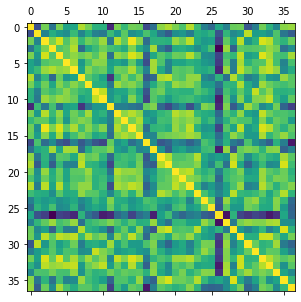

In [4]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)
# Plots the database, but this is unclear

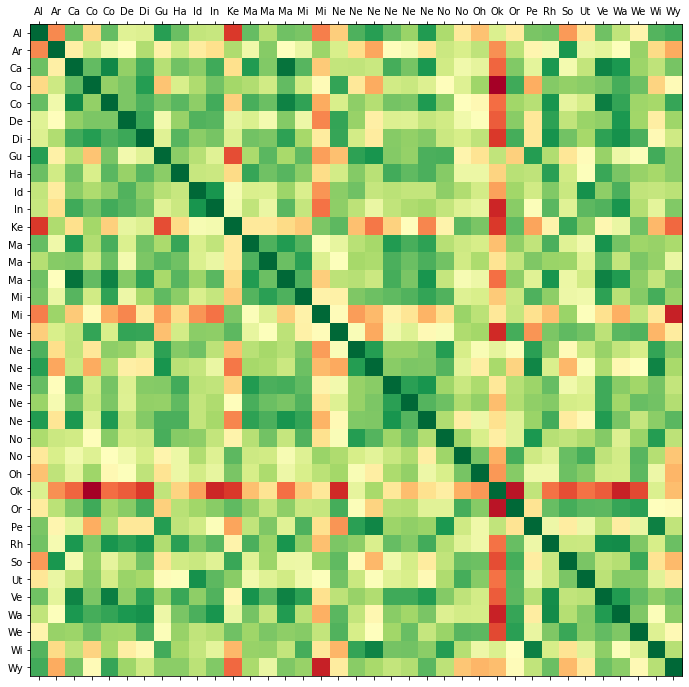

In [14]:
labels = [c[:2] for c in min_wage_corr.columns]
# labels as first two letters
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
# only 1 graph

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)
# plots with colour map RedYellowGreen
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# makes sure we have all labels
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
# sets the axis labels, but we don't have all of them

plt.show()

In [18]:
labels
# we have some labels that overlap, this isn't good, we need some way of mapping state name to 2 letter abbrev - which we will get from another dataset on the internet


['Al',
 'Ar',
 'Ca',
 'Co',
 'Co',
 'De',
 'Di',
 'Gu',
 'Ha',
 'Id',
 'In',
 'Ke',
 'Ma',
 'Ma',
 'Ma',
 'Mi',
 'Mi',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'No',
 'No',
 'Oh',
 'Ok',
 'Or',
 'Pe',
 'Rh',
 'So',
 'Ut',
 'Ve',
 'Wa',
 'We',
 'Wi',
 'Wy']

In [23]:
import pandas as pd
import requests 
web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
dfs = pd.read_html(web.text)
# uses a proxy request, making a db of the website

In [25]:
for df in dfs: 
    print(df.head())
    # shows what tables we have imported

  State Name/District Postal Abbreviation Postal Code
0             Alabama                Ala.          AL
1              Alaska              Alaska          AK
2             Arizona               Ariz.          AZ
3            Arkansas                Ark.          AR
4          California              Calif.          CA
        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP


In [27]:
state_abbv = dfs[0]
state_abbv.head()
# makes a new df of the first table 

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [28]:
state_abbv.to_csv("datasets/state_abbv,csv", index=False)
# save in case website fails in future, but we don't want indexes as they will get called back every time we load the datasets

In [36]:
state_abbv = pd.read_csv("datasets/state_abbv,csv", index_col = 0)
# index at state
state_abbv.head()

,Postal Abbreviation,Postal Code
State Name/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [39]:
abbv_dict = state_abbv[["Postal Code"]].to_dict()
# creates a dictionary from row

In [40]:
abbv_dict = abbv_dict["Postal Code"]
# removes first row
abbv_dict



{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [44]:
# now to map to column
labels = [abbv_dict[c] for c in min_wage_corr.columns]
abbv_dict['Guam'] = "GU" 
# may get errors, but can add manually if needed 

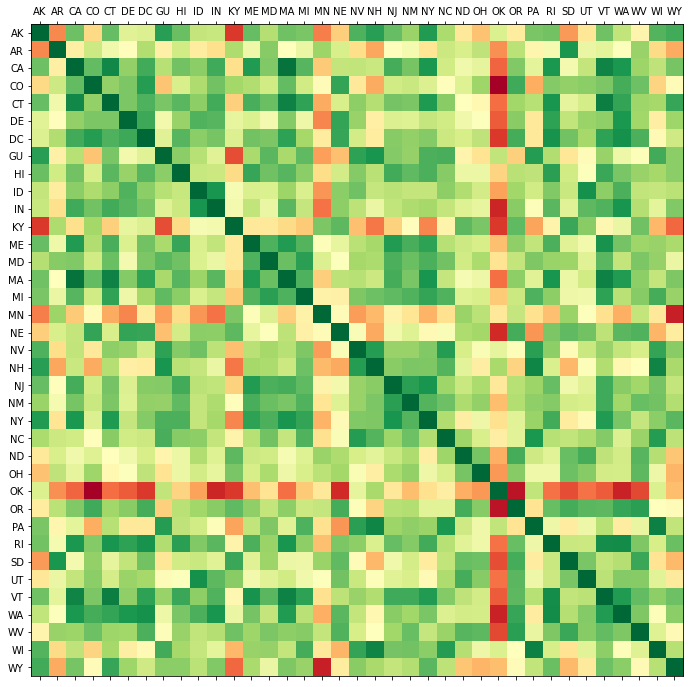

In [46]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]
# labels as first two letters
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
# only 1 graph

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)
# plots with colour map RedYellowGreen
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# makes sure we have all labels
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
# sets the axis labels, but we don't have all of them

plt.show()

## New graph with proper name